# Exploratory Data Analysis - Firmographic Dataset

---
### <i>Changelogs:</i>

  Name  |  Date  |   Description
- **Kiet Vu**  |  03/17  | Create notebook. Minor Editing. Create "Data Understanding" section.
- **Kiet Vu**  |  04/16  | Create Distributrion based on chosen columns 
- **Kiet Vu**  |  04/20  | Create Distributrion for states. Complete the "Clean Data" Phase

#### Notes and Questions:
- What does this "B2B_YEAR_SIC_ADD" variable mean?
- Can we drop "B2B_WHITE_COLLAR_FLAG"?
- B2B_WEALTH_FLAG not numerical.

---

## Table of Contents
**Each phase of the process:**
1. [Data Understanding](#Dataunderstanding)
    1. [Initial Data Report](#Datareport)
    2. [Describe Data](#Describedata)  
    3. [Verify Data Quality](#Verifydataquality)
        1. [Missing Data](#MissingData) 
        2. [Outliers](#Outliers)
    4. [Initial Data Exploration](#Exploredata)
    5. [Data Quality Report](#Dataqualityreport)
2. [Data Preparation](#Datapreparation)
    1. [Select Your Data](#Selectyourdata)
    2. [Cleanse the Data](#Cleansethedata)
        1. [Label Encoding](#labelEncoding)
        2. [Drop Unnecessary Columns](#DropCols)
        3. [Altering Data Types](#AlteringDatatypes)
        4. [Dealing With Zeros](#DealingZeros)
        5. [Dealing With Duplicates](#DealingDuplicates)
        4. [Remove Outliers](#RemoveOutliers)
    3. [Construct Required Data](#Constructrequireddata)
    4. [Integrate Data](#Integratedata)
3. [Exploratory Data Analysis](#EDA)
4. [Modelling](#Modelling)
5. [Evaluation](#Evaluation)
6. [Deployment](#Deployment)

If you want to learn more about CRISP-DM, please refer to this link: https://www.sv-europe.com/crisp-dm-methodology/

---

In [1]:
# Import Libraries Required
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
#import folium
#from folium import plugins
#!pip install --upgrade geopandas
#import geopandas

In [2]:
# Import the orginal dataset
df = pd.read_csv('Raw Data/firmographic_append_data_20230306.csv', low_memory=False, dtype = {'B2B_ADDR_ZIP5':'str'})
df = df.copy()

# first 30 records
df["B2B_ADDR_ZIP5"]=df["B2B_ADDR_ZIP5"].values.astype('str')
df.head(30)

,unique_identifier,B2B_ADDR_ZIP5,B2B_ADDR_STATE,B2B_ACCEPT_CREDIT_CARD_FLAG,B2B_ACCOUNTING_EXPENSE_CODE,B2B_AD_SIZE,B2B_ADVERTISING_EXPENSE_CODE,B2B_ASSET_FLAG,B2B_BANKRUPTCY_DATE,B2B_BANKRUPTCY_FLAG,...,B2B_TOT_SALES_VOLUME,B2B_TRANSACTION_CODE,B2B_TRANSACTION_TYPE,B2B_TRUE_FRNCHSE_FLAG,B2B_UTILITY_CODE,B2B_WEALTH_FLAG,B2B_WHITE_COLLAR_FLAG,B2B_WHITE_COLLAR_PRCNT,B2B_YEAR_SIC_ADD,CAC_SEGMENT
0,0001230a214b39e0e5c463bfe440fb15,44240,OH,NaN,C,A,A,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,D,NaN,NaN,25.0,201801.0,Manufacturing
1,000345e997e72b61b990d2689c76427f,15218,PA,NaN,D,A,C,NaN,NaN,NaN,...,NaN,A,NaN,NaN,B,NaN,1.0,99.0,198405.0,Business and Finance
2,0003c4d7aeb24f319f0d7c6ddb60bb8f,44067,OH,ADMV,C,B,B,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,A,1.0,NaN,16.0,201909.0,Personal Services
3,00082675e86a9f3cf5fdcc5d4cd9114d,60618,IL,NaN,D,NaN,B,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,C,NaN,NaN,21.0,199104.0,Blue Collar Work
4,00095201031df44962513f378842d521,61111,IL,DMV,A,A,A,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,A,NaN,1.0,83.0,201303.0,General Merchandise
5,000a04481ee5acbb856a7c485a67423a,62526,IL,NaN,E,A,D,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,D,NaN,1.0,50.0,201902.0,Personal Services
6,000a1fe8f9d0caf306b805de359b6947,14472,NY,NaN,G,B,F,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,D,NaN,1.0,54.0,202208.0,Wholesale
7,000bee0b537b676a975a15999776581f,02110,MA,NaN,C,B,C,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,A,NaN,NaN,10.0,202011.0,Food and Dining
8,000c88d34beda722f7b559bb056b7809,78064,TX,ADMV,A,A,A,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,A,NaN,NaN,29.0,201303.0,Hotels and Educational Boarding
9,000cc270c1cc3f09a4a80c2489ce4bac,08401,NJ,ADMV,E,A,E,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,B,NaN,NaN,10.0,200309.0,Food and Dining


---
## 1. Data Understanding <a class="anchor" id="Dataunderstanding"></a>

### 1.2 Describe Data <a class="anchor" id="Describedata"></a>

In [3]:
df.dtypes

unique_identifier               object
B2B_ADDR_ZIP5                   object
B2B_ADDR_STATE                  object
B2B_ACCEPT_CREDIT_CARD_FLAG     object
B2B_ACCOUNTING_EXPENSE_CODE     object
                                ...   
B2B_WEALTH_FLAG                float64
B2B_WHITE_COLLAR_FLAG          float64
B2B_WHITE_COLLAR_PRCNT         float64
B2B_YEAR_SIC_ADD               float64
CAC_SEGMENT                     object
Length: 101, dtype: object

In [4]:
df.columns

Index(['unique_identifier', 'B2B_ADDR_ZIP5', 'B2B_ADDR_STATE',
       'B2B_ACCEPT_CREDIT_CARD_FLAG', 'B2B_ACCOUNTING_EXPENSE_CODE',
       'B2B_AD_SIZE', 'B2B_ADVERTISING_EXPENSE_CODE', 'B2B_ASSET_FLAG',
       'B2B_BANKRUPTCY_DATE', 'B2B_BANKRUPTCY_FLAG',
       ...
       'B2B_TOT_SALES_VOLUME', 'B2B_TRANSACTION_CODE', 'B2B_TRANSACTION_TYPE',
       'B2B_TRUE_FRNCHSE_FLAG', 'B2B_UTILITY_CODE', 'B2B_WEALTH_FLAG',
       'B2B_WHITE_COLLAR_FLAG', 'B2B_WHITE_COLLAR_PRCNT', 'B2B_YEAR_SIC_ADD',
       'CAC_SEGMENT'],
      dtype='object', length=101)

In [5]:
df.size

6048486

In [6]:
df.shape

(59886, 101)

In [7]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59886 entries, 0 to 59885
Data columns (total 101 columns):
 #    Column                           Dtype  
---   ------                           -----  
 0    unique_identifier                object 
 1    B2B_ADDR_ZIP5                    object 
 2    B2B_ADDR_STATE                   object 
 3    B2B_ACCEPT_CREDIT_CARD_FLAG      object 
 4    B2B_ACCOUNTING_EXPENSE_CODE      object 
 5    B2B_AD_SIZE                      object 
 6    B2B_ADVERTISING_EXPENSE_CODE     object 
 7    B2B_ASSET_FLAG                   float64
 8    B2B_BANKRUPTCY_DATE              float64
 9    B2B_BANKRUPTCY_FLAG              object 
 10   B2B_BIG_BUSINESS_INDICATOR       object 
 11   B2B_BUSINESS_DESCRIP_FLAG        object 
 12   B2B_BUSINESS_GROW_FLAG           object 
 13   B2B_BUSINESS_SQUARE_FOOT_NUM     object 
 14   B2B_BUSINESS_STATUS_CODE         float64
 15   B2B_CALL_STATUS                  object 
 16   B2B_COMPUTER_EXPENSE_CODE        objec

In [8]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)
newdf

,B2B_ASSET_FLAG,B2B_BANKRUPTCY_DATE,B2B_BUSINESS_STATUS_CODE,B2B_CREDIT_SCORE,B2B_EMPLOYEE_NUM,B2B_EXPRESS_UPDATE,B2B_FEMALE_OWNED_BUSINESS,B2B_FIRST_YEAR_CCYY,B2B_FOREIGN_PARENT_FLAG,B2B_FORTUNE_RANK,...,B2B_SECONDARY_SIC_CODE4,B2B_SIC_CODE,B2B_STATE_CODE,B2B_TOT_EMPLOYEE_NUM,B2B_TOT_SALES_VOLUME,B2B_TRUE_FRNCHSE_FLAG,B2B_WEALTH_FLAG,B2B_WHITE_COLLAR_FLAG,B2B_WHITE_COLLAR_PRCNT,B2B_YEAR_SIC_ADD
0,NaN,NaN,NaN,90.0,10.0,NaN,NaN,2005.0,NaN,NaN,...,NaN,359903.0,39.0,NaN,NaN,2.0,NaN,NaN,25.0,201801.0
1,NaN,NaN,NaN,81.0,6.0,NaN,NaN,1984.0,NaN,NaN,...,NaN,641112.0,42.0,NaN,NaN,NaN,NaN,1.0,99.0,198405.0
2,NaN,NaN,NaN,79.0,15.0,NaN,NaN,2009.0,NaN,NaN,...,NaN,723106.0,39.0,NaN,NaN,2.0,1.0,NaN,16.0,201909.0
3,NaN,NaN,NaN,88.0,9.0,NaN,NaN,1991.0,NaN,NaN,...,NaN,171117.0,17.0,NaN,NaN,2.0,NaN,NaN,21.0,199104.0
4,NaN,NaN,NaN,69.0,1.0,NaN,NaN,2007.0,NaN,NaN,...,NaN,599909.0,17.0,NaN,NaN,2.0,NaN,1.0,83.0,201303.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59881,NaN,NaN,NaN,89.0,3.0,NaN,NaN,2014.0,NaN,NaN,...,NaN,871202.0,25.0,NaN,NaN,2.0,1.0,1.0,94.0,201910.0
59882,NaN,NaN,NaN,87.0,8.0,NaN,NaN,2006.0,NaN,NaN,...,NaN,754206.0,48.0,NaN,NaN,2.0,NaN,NaN,17.0,201303.0
59883,NaN,NaN,NaN,84.0,5.0,NaN,NaN,1997.0,NaN,NaN,...,NaN,899918.0,25.0,NaN,NaN,2.0,NaN,NaN,21.0,201902.0
59884,NaN,NaN,NaN,87.0,38.0,NaN,NaN,1988.0,NaN,NaN,...,NaN,821103.0,34.0,NaN,NaN,2.0,1.0,1.0,80.0,200501.0


In [9]:
print(df[['B2B_TOT_SALES_VOLUME']].to_string(index=False)) 

 B2B_TOT_SALES_VOLUME
                  NaN
                  NaN
                  NaN
                  NaN
                  NaN
                  NaN
                  NaN
                  NaN
                  NaN
                  NaN
                  NaN
                  NaN
                  NaN
                  NaN
                  NaN
                  NaN
                  NaN
              48500.0
                  NaN
                  NaN
                  NaN
                  NaN
                  NaN
                  NaN
                  NaN
                  NaN
                  NaN
                  NaN
                  NaN
                  NaN
                  NaN
                  NaN
                  NaN
                  NaN
                  NaN
                  NaN
                  NaN
                  NaN
                  NaN
                  NaN
                  NaN
                  NaN
                  NaN
                  NaN
          

C:\Users\PREDATOR\AppData\Local\Temp\ipykernel_13768\860523988.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=[15,8])


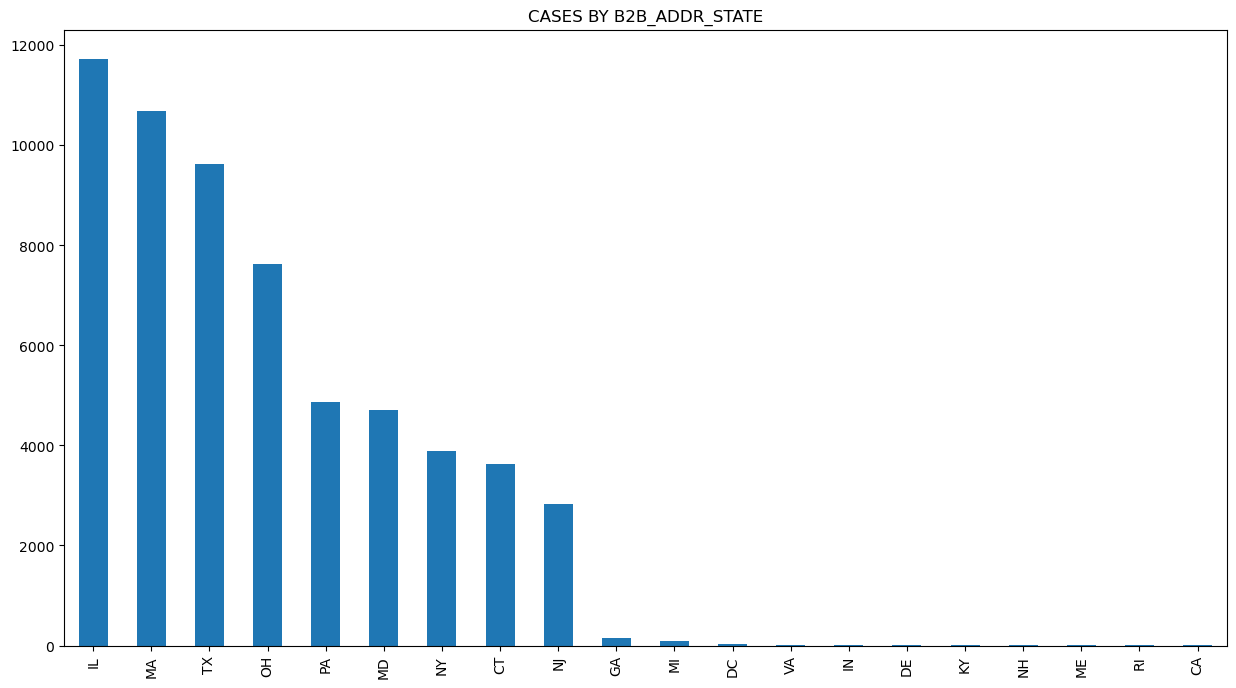

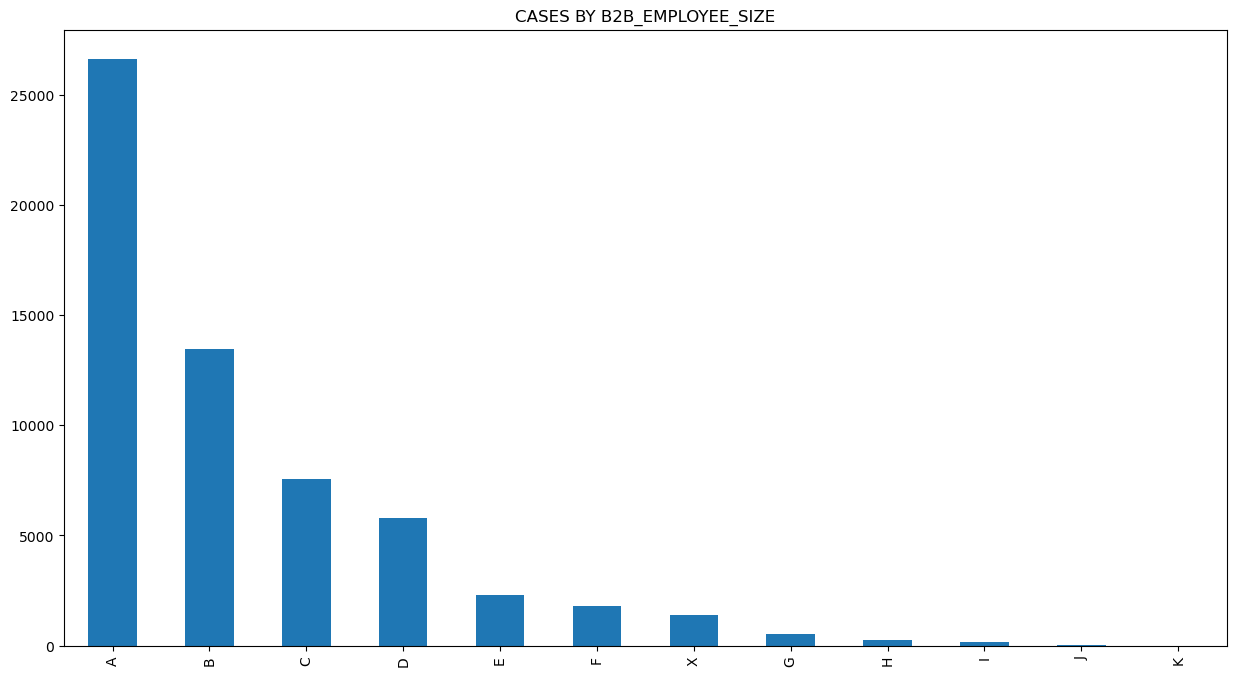

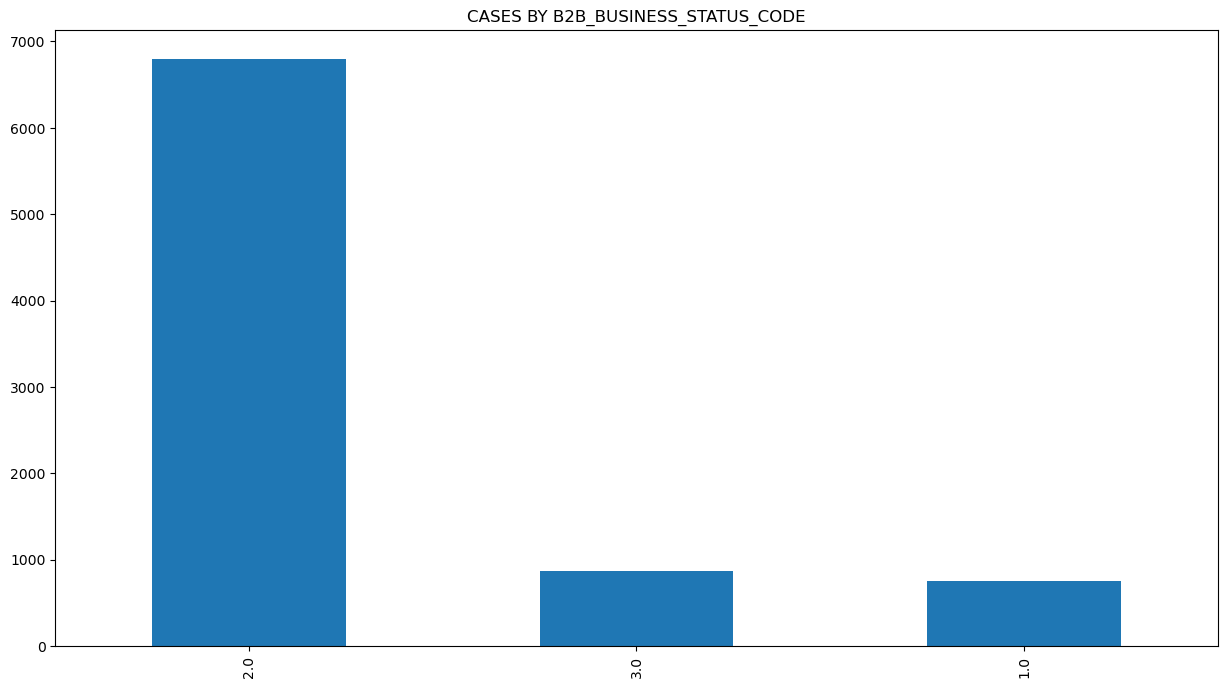

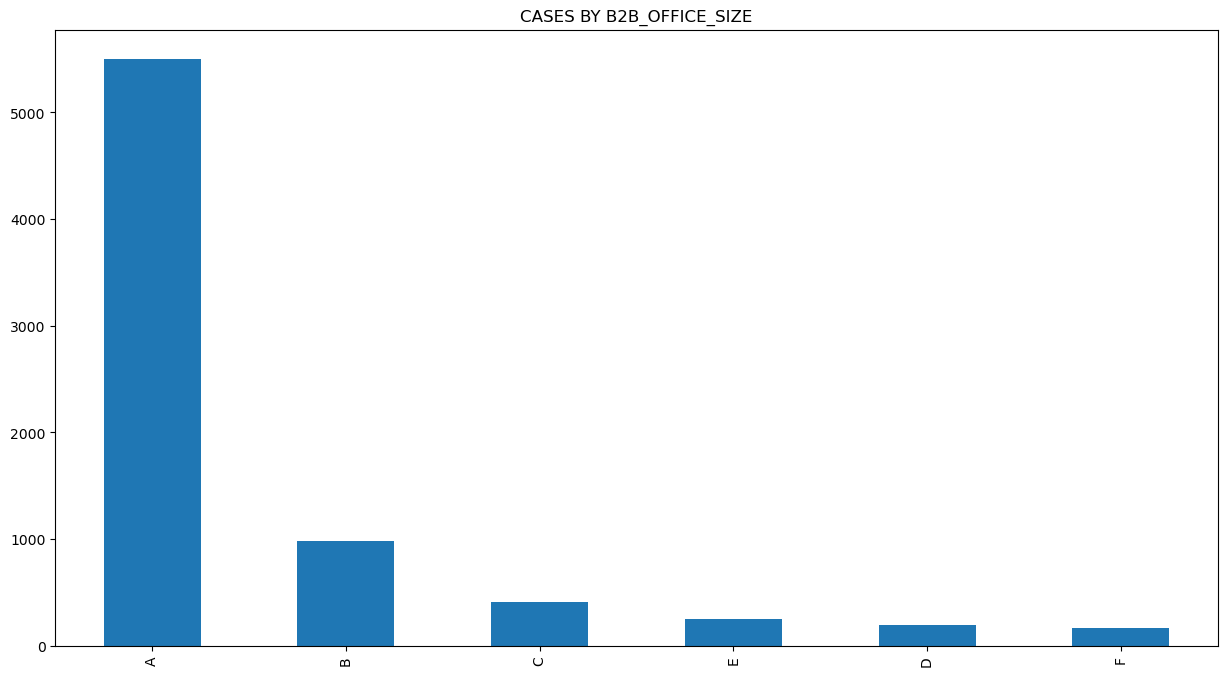

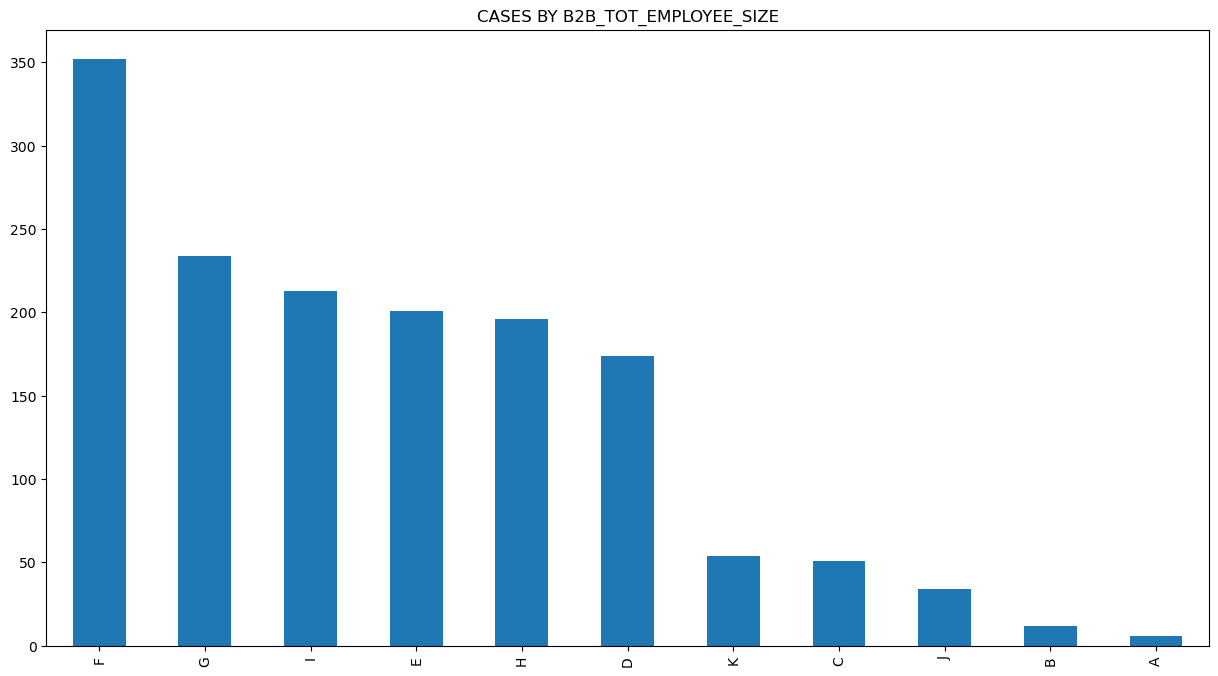

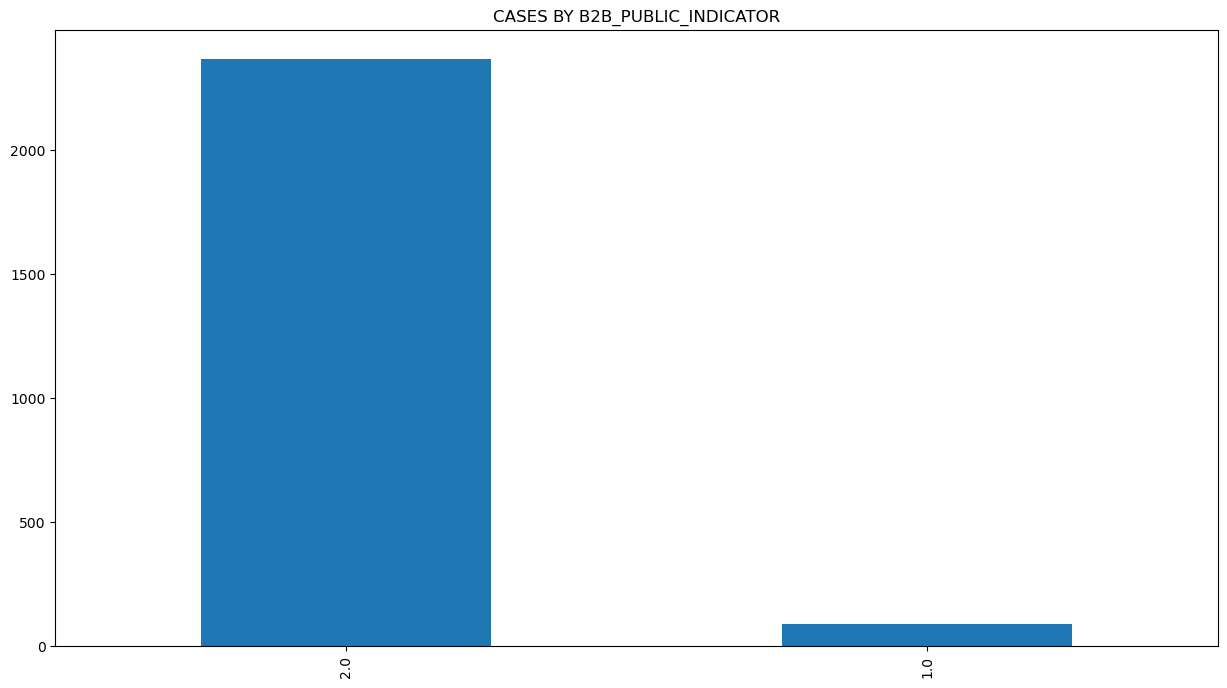

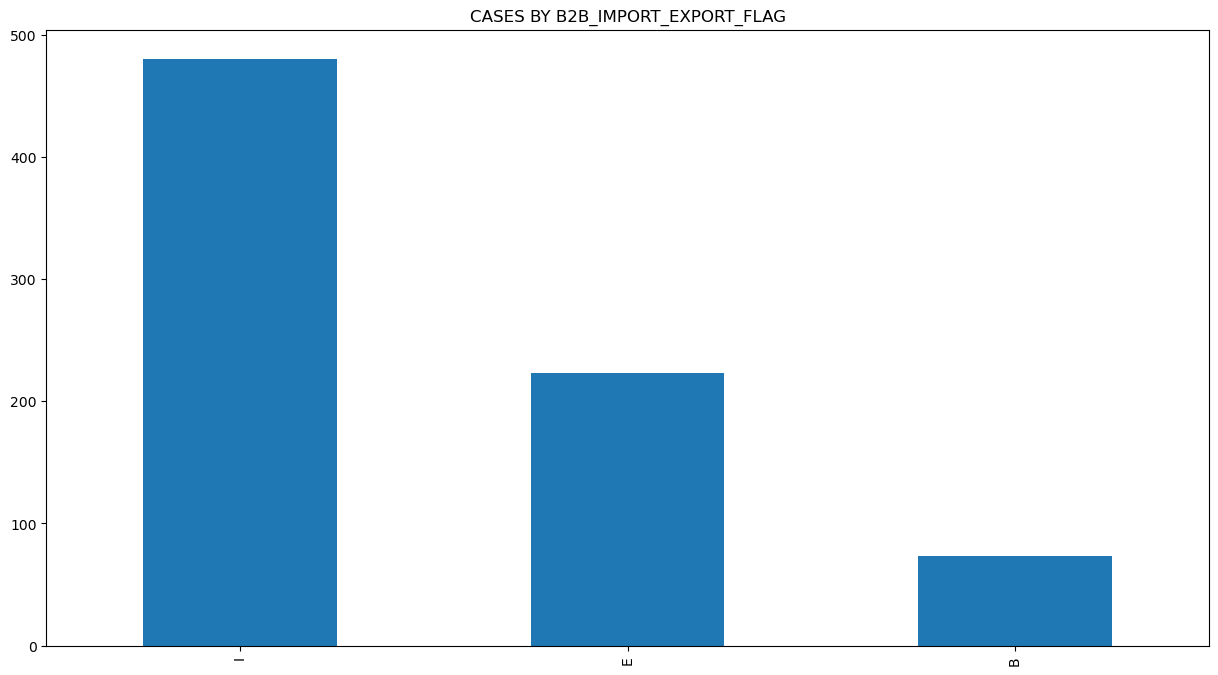

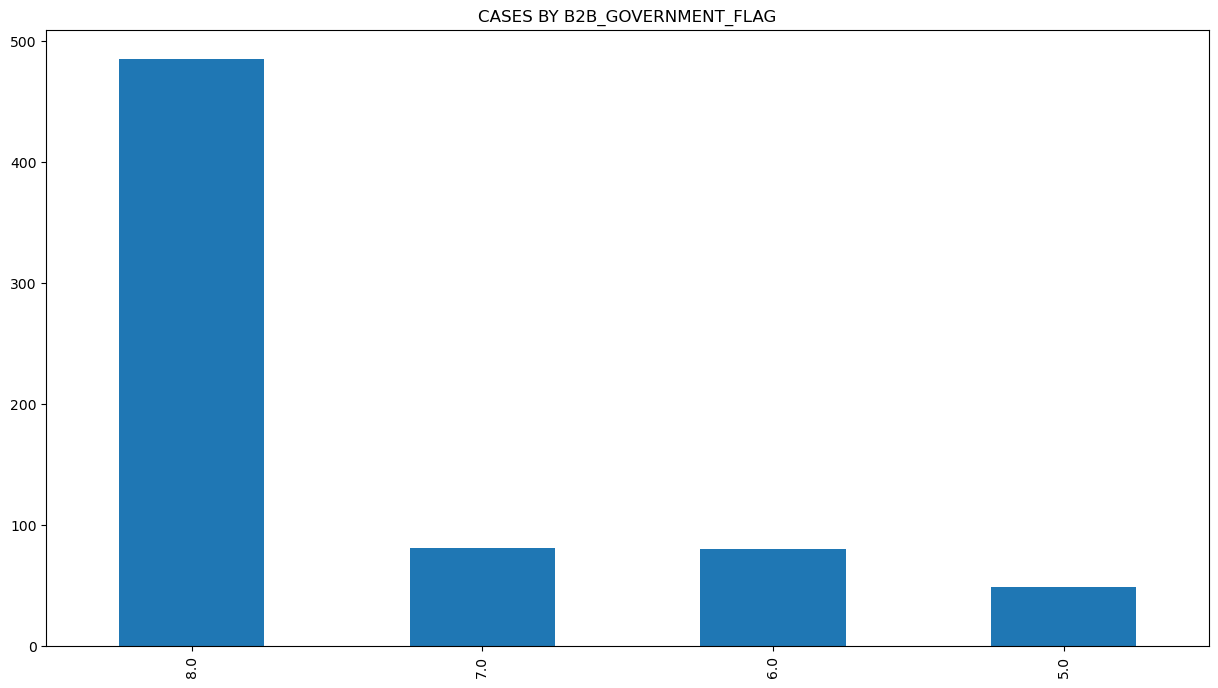

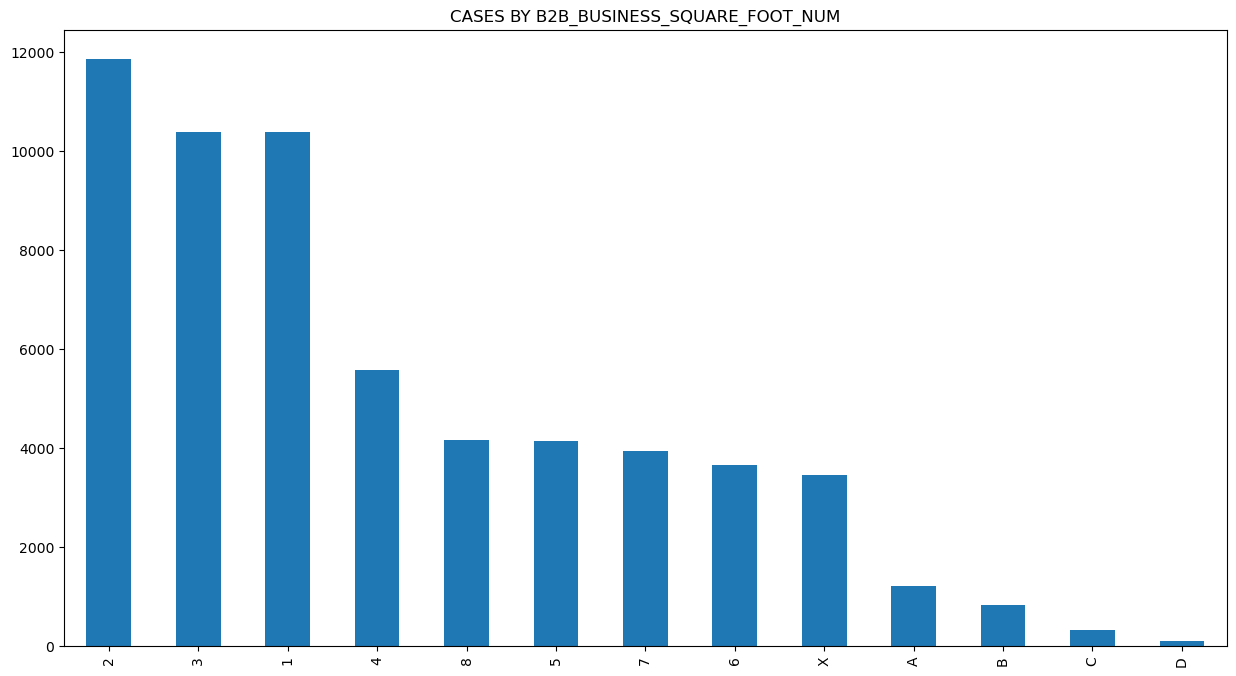

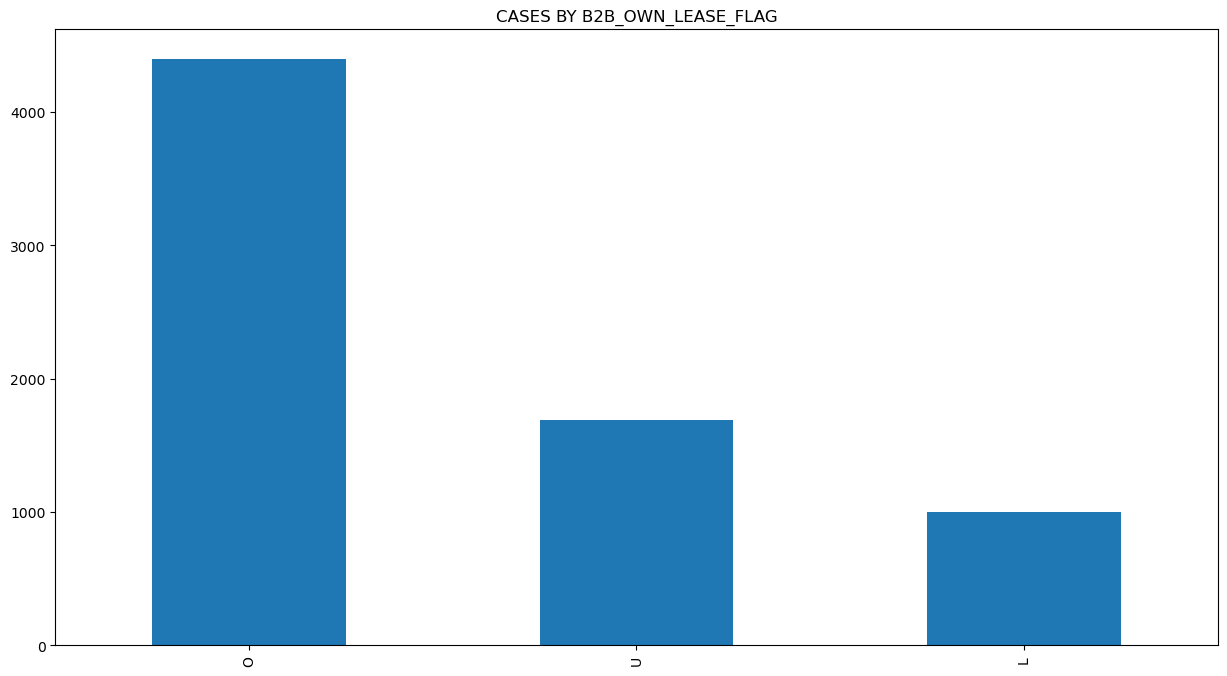

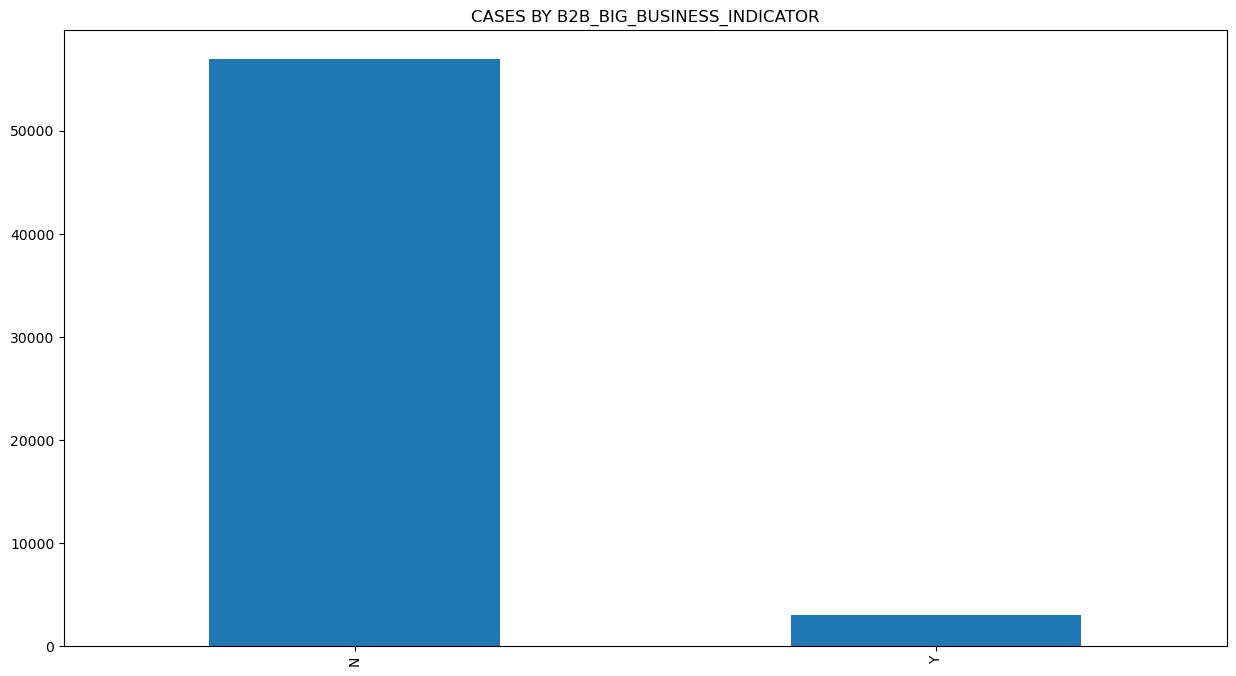

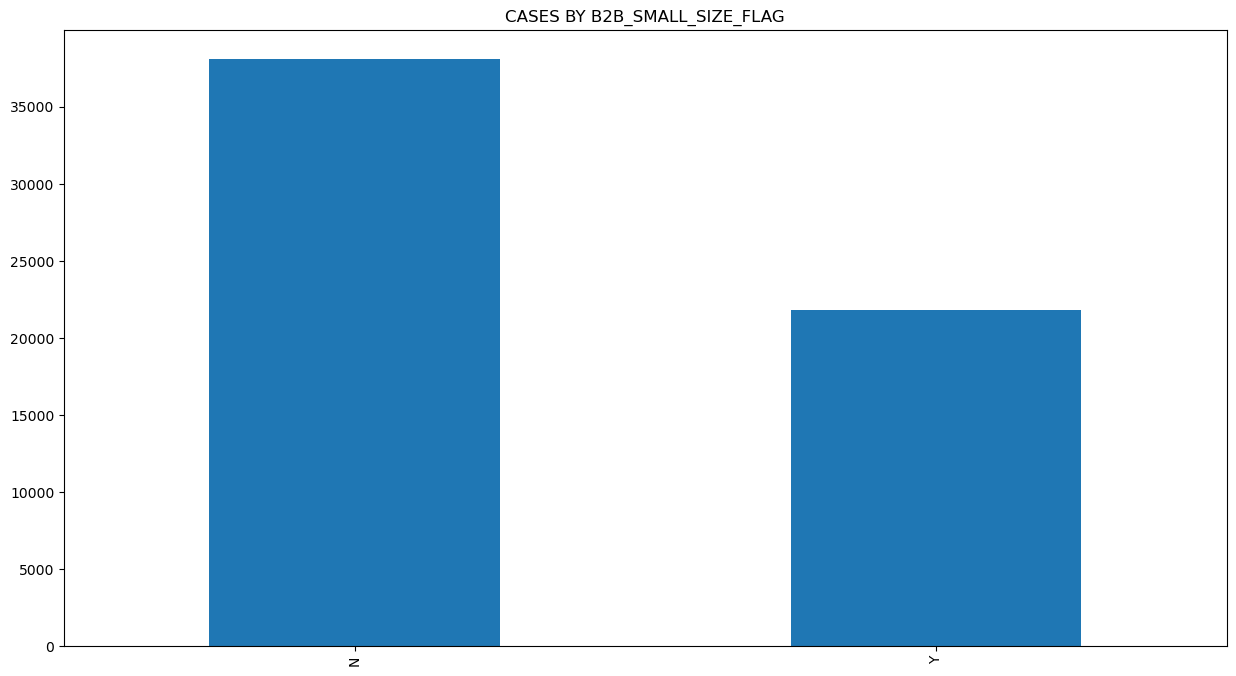

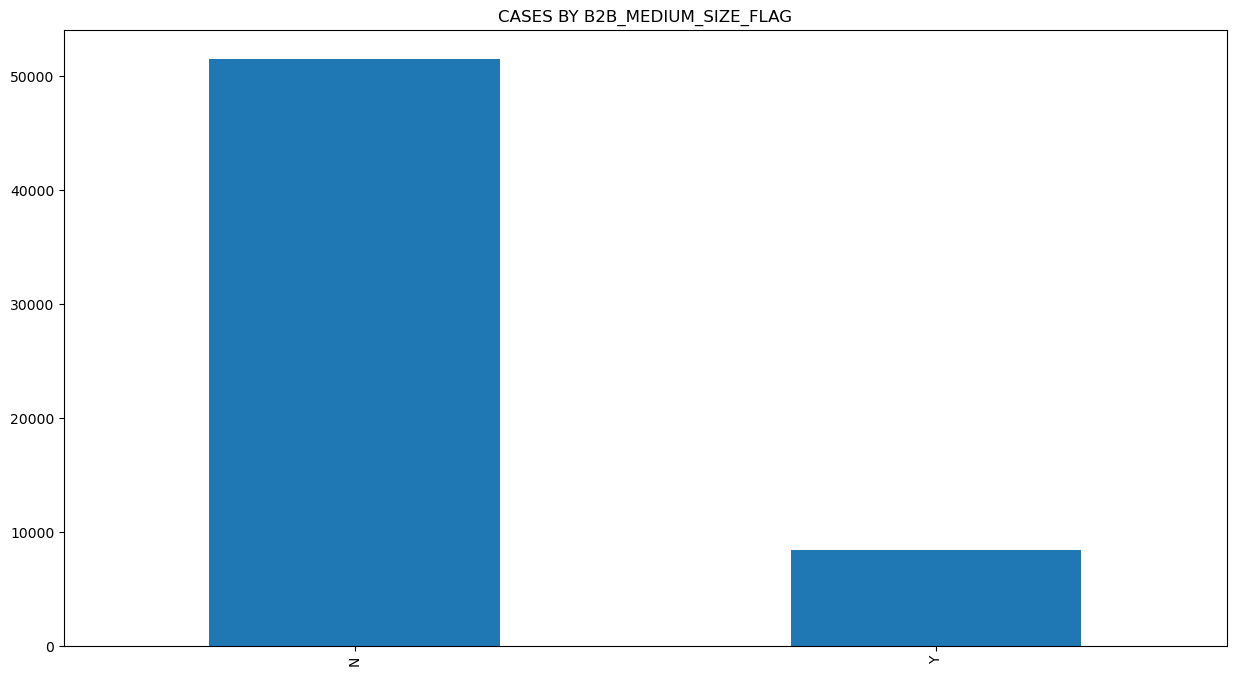

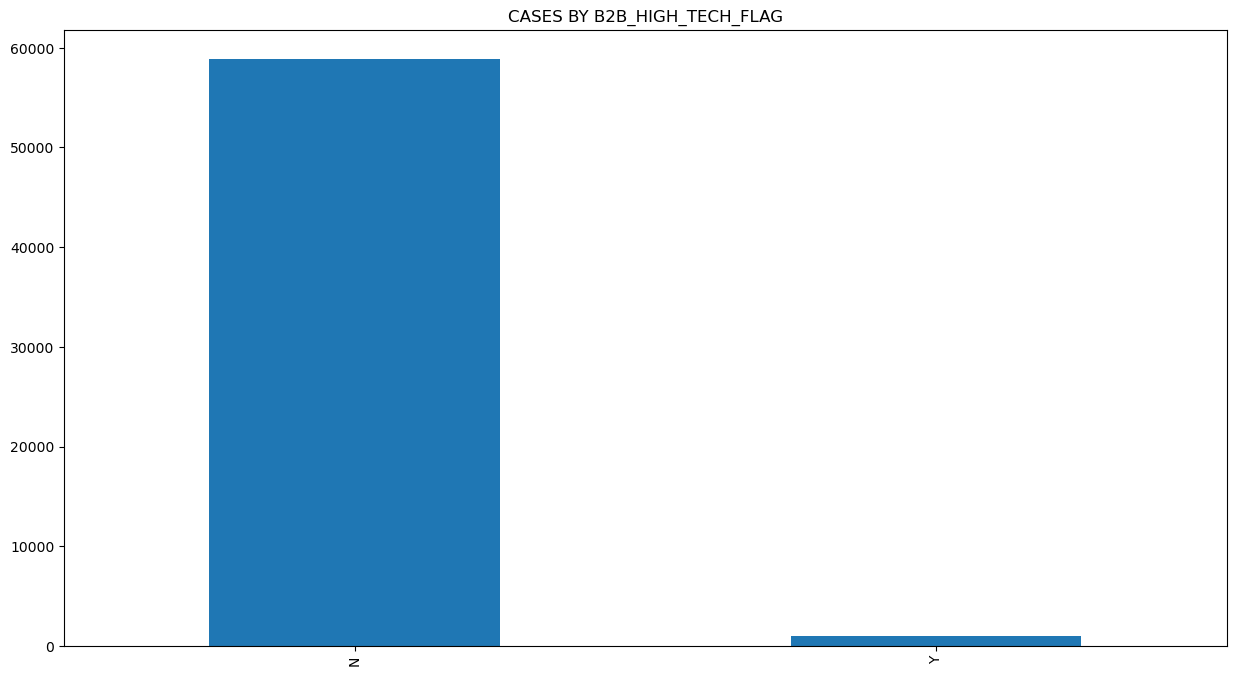

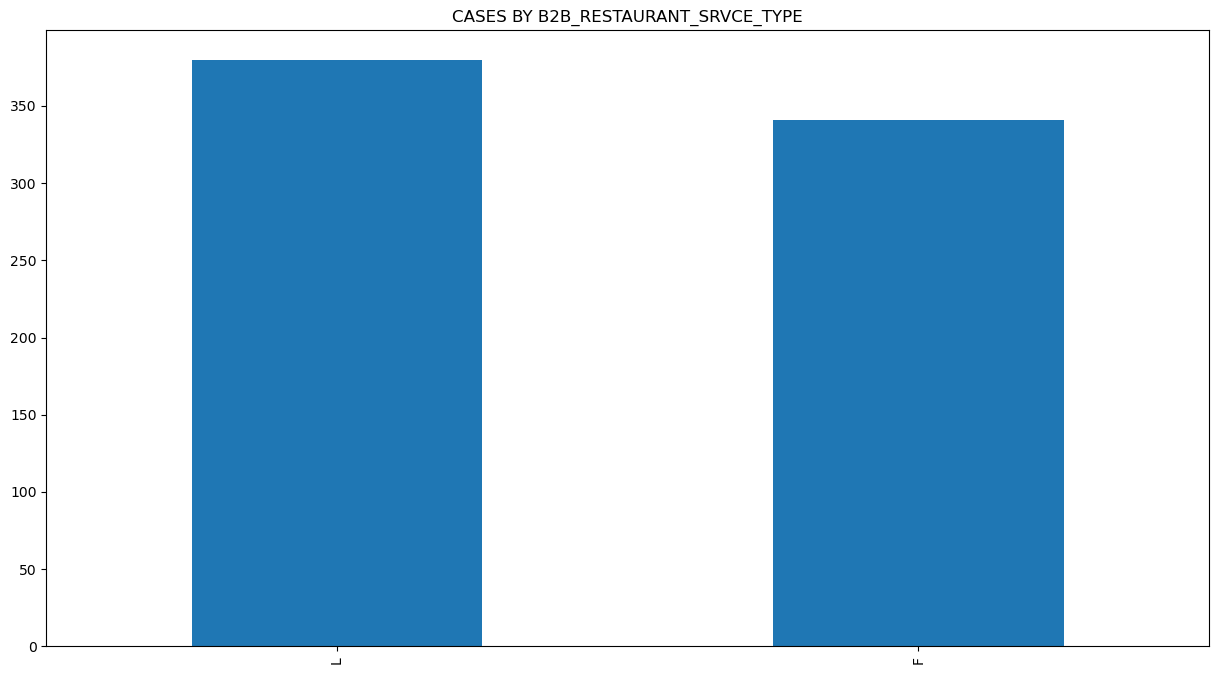

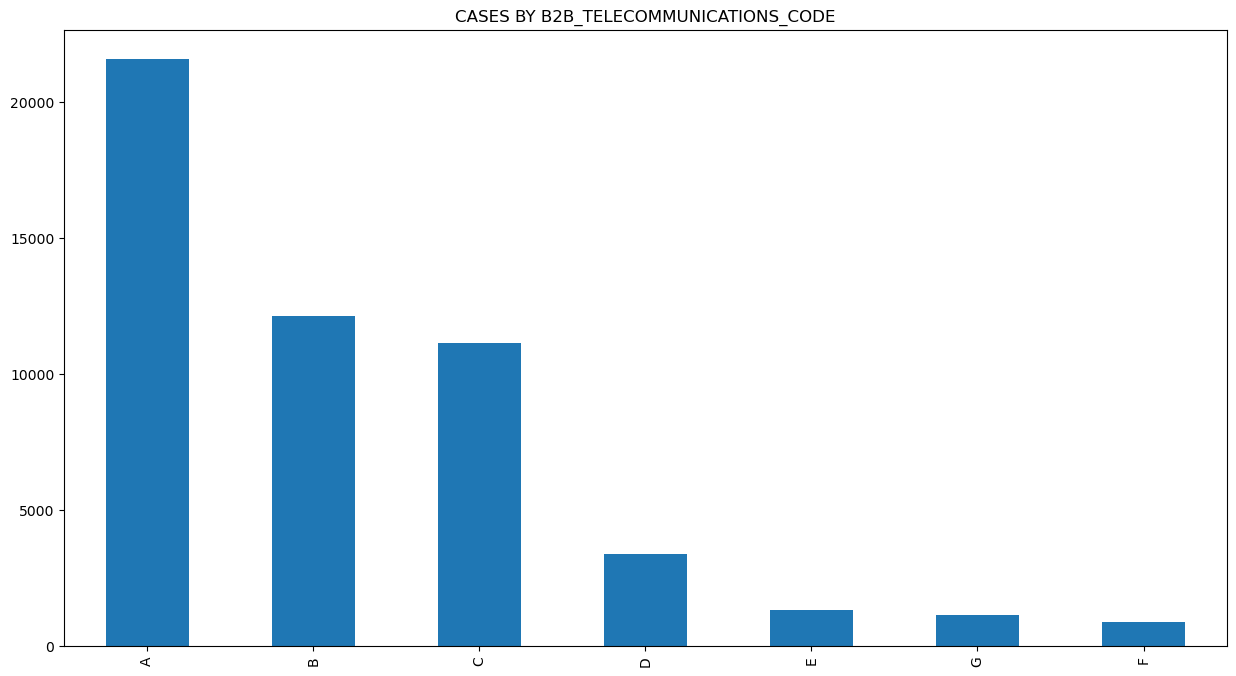

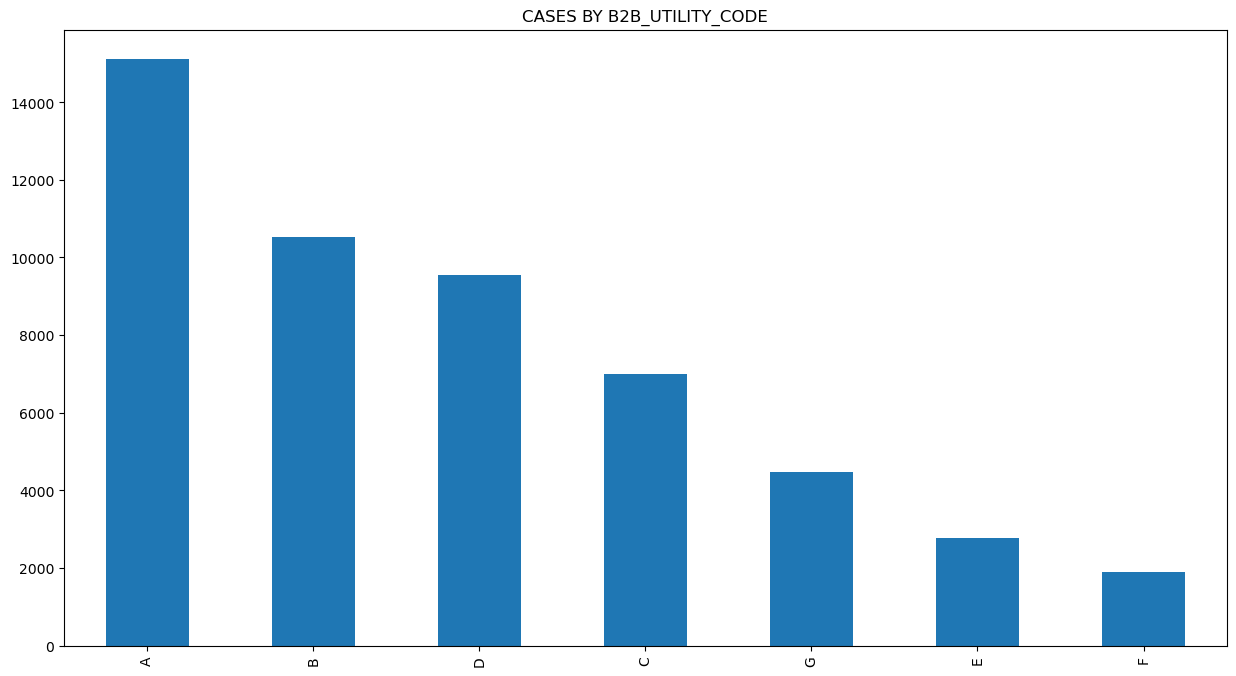

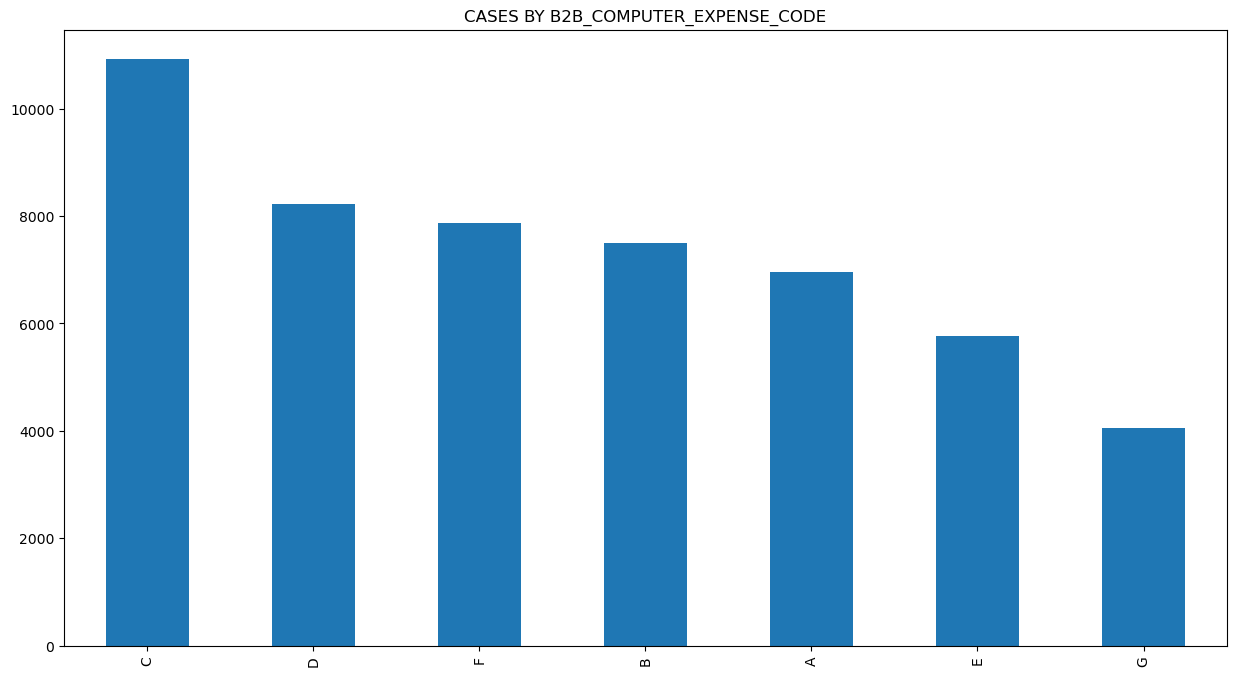

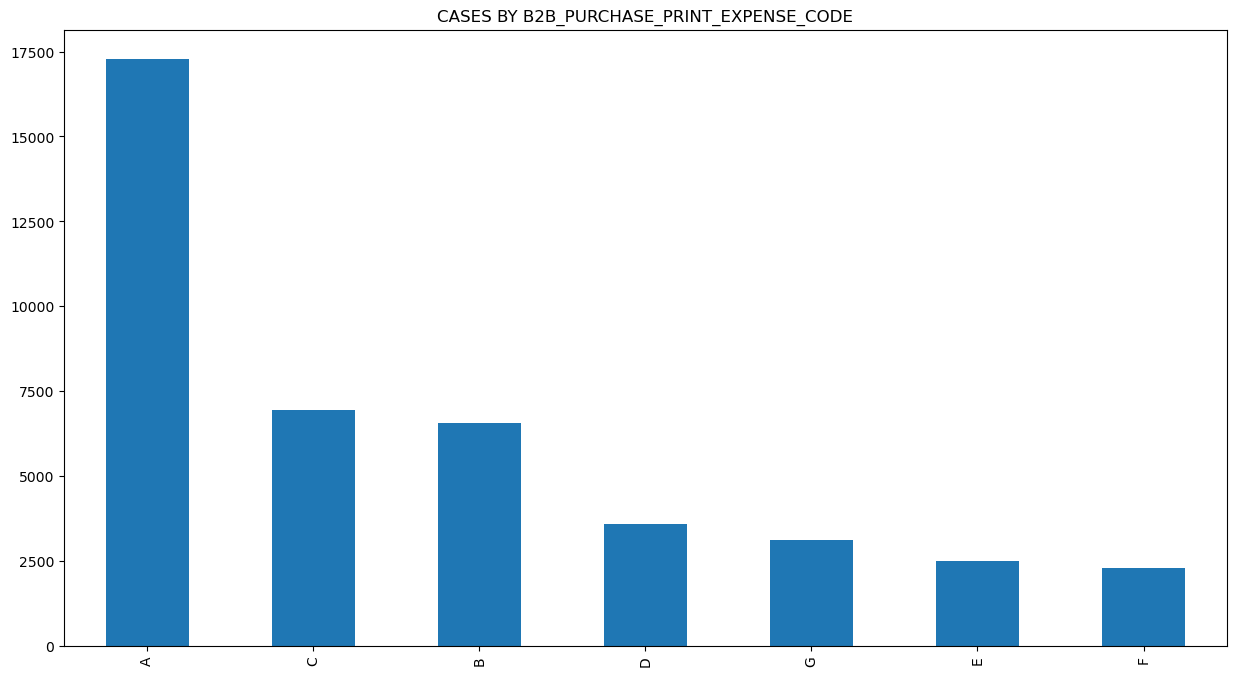

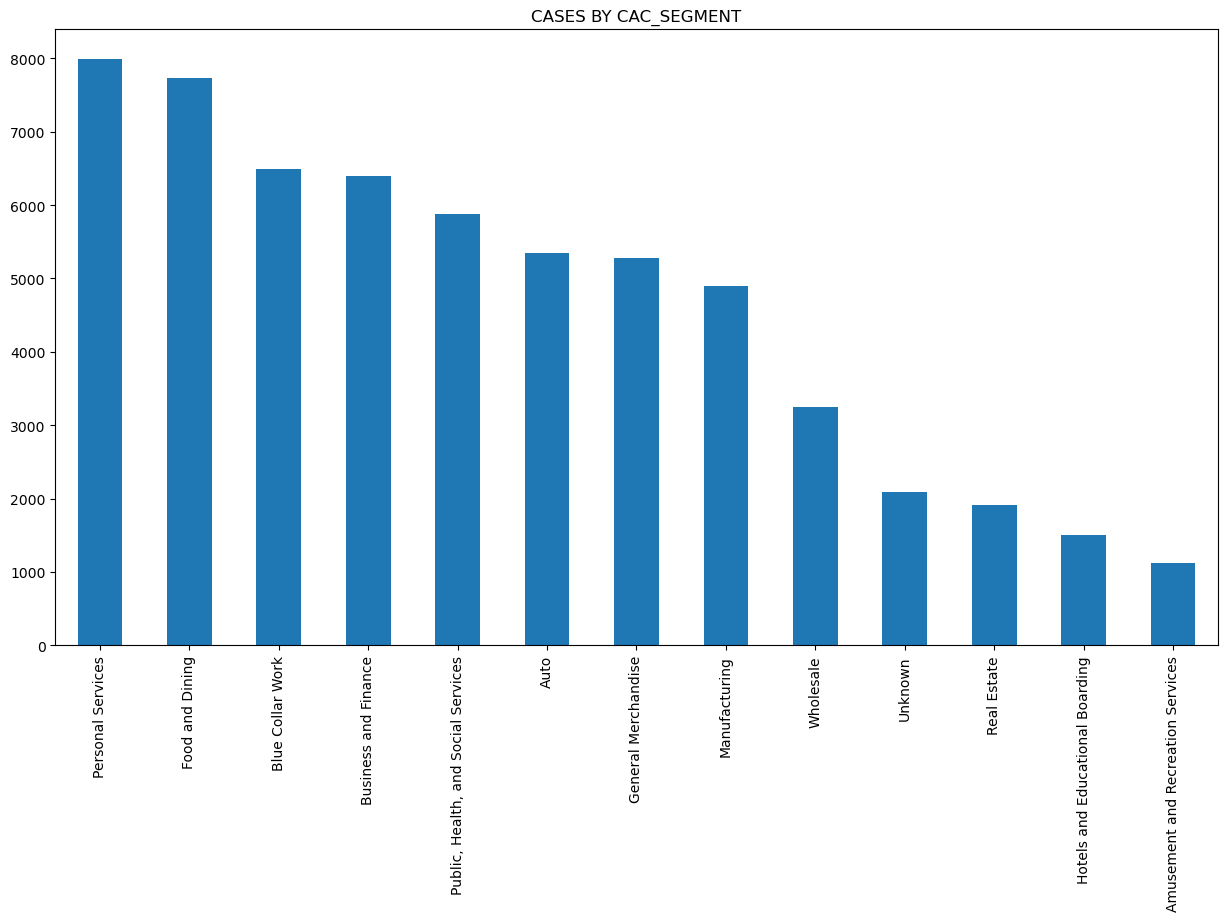

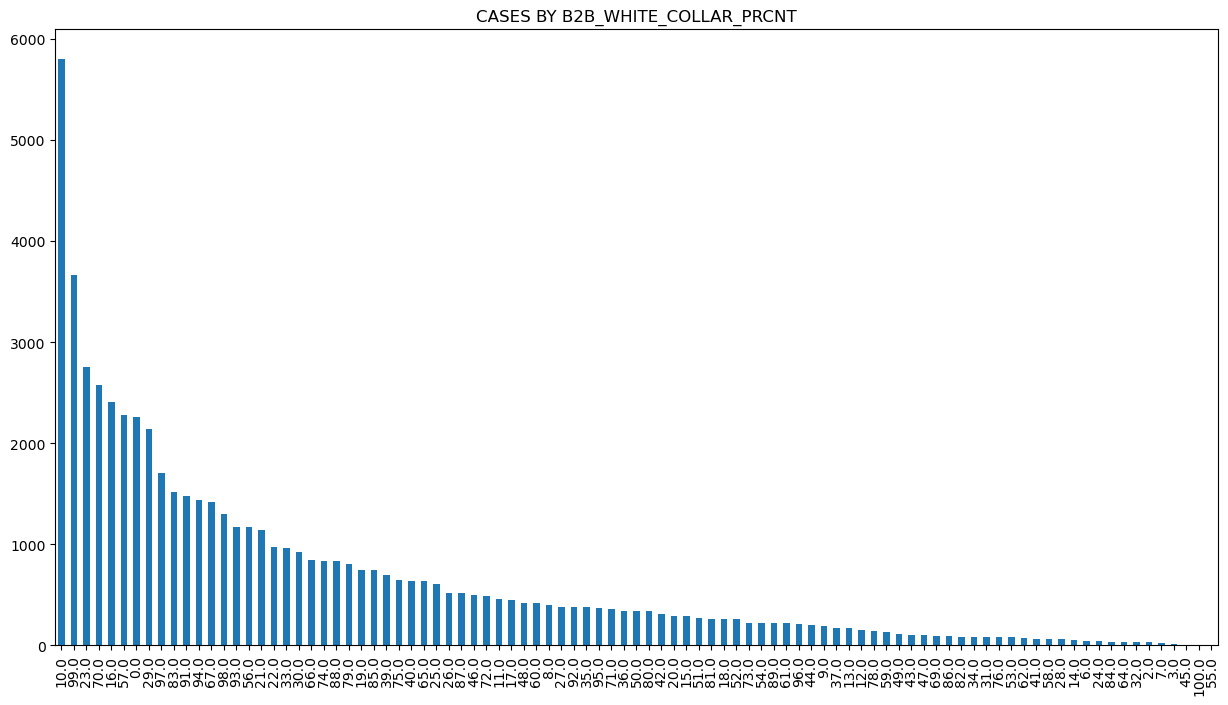

In [10]:
col_names = ["B2B_ADDR_STATE",
"B2B_EMPLOYEE_SIZE",
"B2B_BUSINESS_STATUS_CODE",
"B2B_OFFICE_SIZE",
"B2B_TOT_EMPLOYEE_SIZE",
"B2B_PUBLIC_INDICATOR",
"B2B_IMPORT_EXPORT_FLAG",
"B2B_GOVERNMENT_FLAG",
"B2B_BUSINESS_SQUARE_FOOT_NUM",
"B2B_OWN_LEASE_FLAG",
"B2B_BIG_BUSINESS_INDICATOR",
"B2B_SMALL_SIZE_FLAG",
"B2B_MEDIUM_SIZE_FLAG",
"B2B_HIGH_TECH_FLAG",
"B2B_RESTAURANT_SRVCE_TYPE",
"B2B_TELECOMMUNICATIONS_CODE",
"B2B_UTILITY_CODE",
"B2B_COMPUTER_EXPENSE_CODE",
"B2B_PURCHASE_PRINT_EXPENSE_CODE",
"CAC_SEGMENT",
"B2B_WHITE_COLLAR_PRCNT"]

for col_val in col_names:
    plt.figure(figsize=[15,8])
    df[col_val].value_counts().plot.bar(title=f'CASES BY {col_val}')

Drop States column

CA
DE
GA
IN
KY
ME
MI
RI
VA
DC
NH

In [11]:
state_list = ["CA","DE","GA","IN","KY","ME","MI","RI","VA","DC","NH"]
df2 = df[~df['B2B_ADDR_STATE'].isin(state_list)]
df2

,unique_identifier,B2B_ADDR_ZIP5,B2B_ADDR_STATE,B2B_ACCEPT_CREDIT_CARD_FLAG,B2B_ACCOUNTING_EXPENSE_CODE,B2B_AD_SIZE,B2B_ADVERTISING_EXPENSE_CODE,B2B_ASSET_FLAG,B2B_BANKRUPTCY_DATE,B2B_BANKRUPTCY_FLAG,...,B2B_TOT_SALES_VOLUME,B2B_TRANSACTION_CODE,B2B_TRANSACTION_TYPE,B2B_TRUE_FRNCHSE_FLAG,B2B_UTILITY_CODE,B2B_WEALTH_FLAG,B2B_WHITE_COLLAR_FLAG,B2B_WHITE_COLLAR_PRCNT,B2B_YEAR_SIC_ADD,CAC_SEGMENT
0,0001230a214b39e0e5c463bfe440fb15,44240,OH,NaN,C,A,A,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,D,NaN,NaN,25.0,201801.0,Manufacturing
1,000345e997e72b61b990d2689c76427f,15218,PA,NaN,D,A,C,NaN,NaN,NaN,...,NaN,A,NaN,NaN,B,NaN,1.0,99.0,198405.0,Business and Finance
2,0003c4d7aeb24f319f0d7c6ddb60bb8f,44067,OH,ADMV,C,B,B,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,A,1.0,NaN,16.0,201909.0,Personal Services
3,00082675e86a9f3cf5fdcc5d4cd9114d,60618,IL,NaN,D,NaN,B,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,C,NaN,NaN,21.0,199104.0,Blue Collar Work
4,00095201031df44962513f378842d521,61111,IL,DMV,A,A,A,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,A,NaN,1.0,83.0,201303.0,General Merchandise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59881,fffce8918ebaae88423f62806f22c414,02026,MA,NaN,C,A,A,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,A,1.0,1.0,94.0,201910.0,Business and Finance
59882,fffd155082881fa090b08ca6ceed7005,78503,TX,NaN,B,NaN,A,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,B,NaN,NaN,17.0,201303.0,Auto
59883,fffe3fcb6ca0166ec15af3958ac145e8,02453,MA,NaN,C,A,B,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,A,NaN,NaN,21.0,201902.0,Personal Services
59884,fffef4c75ffee0863657cb631c4245cf,07945,NJ,NaN,NaN,A,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,1.0,1.0,80.0,200501.0,Hotels and Educational Boarding


In [12]:
df2['B2B_ADDR_STATE'].unique()

array(['OH', 'PA', 'IL', 'NY', 'MA', 'TX', 'NJ', 'MD', 'CT', nan],
      dtype=object)

In [13]:
df2 = df2[df2['B2B_ADDR_STATE'].notna()]
df2['B2B_ADDR_STATE'].unique()

array(['OH', 'PA', 'IL', 'NY', 'MA', 'TX', 'NJ', 'MD', 'CT'], dtype=object)

In [14]:
df2

,unique_identifier,B2B_ADDR_ZIP5,B2B_ADDR_STATE,B2B_ACCEPT_CREDIT_CARD_FLAG,B2B_ACCOUNTING_EXPENSE_CODE,B2B_AD_SIZE,B2B_ADVERTISING_EXPENSE_CODE,B2B_ASSET_FLAG,B2B_BANKRUPTCY_DATE,B2B_BANKRUPTCY_FLAG,...,B2B_TOT_SALES_VOLUME,B2B_TRANSACTION_CODE,B2B_TRANSACTION_TYPE,B2B_TRUE_FRNCHSE_FLAG,B2B_UTILITY_CODE,B2B_WEALTH_FLAG,B2B_WHITE_COLLAR_FLAG,B2B_WHITE_COLLAR_PRCNT,B2B_YEAR_SIC_ADD,CAC_SEGMENT
0,0001230a214b39e0e5c463bfe440fb15,44240,OH,NaN,C,A,A,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,D,NaN,NaN,25.0,201801.0,Manufacturing
1,000345e997e72b61b990d2689c76427f,15218,PA,NaN,D,A,C,NaN,NaN,NaN,...,NaN,A,NaN,NaN,B,NaN,1.0,99.0,198405.0,Business and Finance
2,0003c4d7aeb24f319f0d7c6ddb60bb8f,44067,OH,ADMV,C,B,B,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,A,1.0,NaN,16.0,201909.0,Personal Services
3,00082675e86a9f3cf5fdcc5d4cd9114d,60618,IL,NaN,D,NaN,B,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,C,NaN,NaN,21.0,199104.0,Blue Collar Work
4,00095201031df44962513f378842d521,61111,IL,DMV,A,A,A,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,A,NaN,1.0,83.0,201303.0,General Merchandise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59881,fffce8918ebaae88423f62806f22c414,02026,MA,NaN,C,A,A,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,A,1.0,1.0,94.0,201910.0,Business and Finance
59882,fffd155082881fa090b08ca6ceed7005,78503,TX,NaN,B,NaN,A,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,B,NaN,NaN,17.0,201303.0,Auto
59883,fffe3fcb6ca0166ec15af3958ac145e8,02453,MA,NaN,C,A,B,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,A,NaN,NaN,21.0,201902.0,Personal Services
59884,fffef4c75ffee0863657cb631c4245cf,07945,NJ,NaN,NaN,A,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,1.0,1.0,80.0,200501.0,Hotels and Educational Boarding


In [15]:
print(f'we have deleted {len(df.index)-len(df2.index)} rows')

we have deleted 304 rows
